In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import scipy.stats as stats
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

## Introduction

While searching for the dream house, the buyer looks at various factors, not just at the height of the basement ceiling or the proximity to an east-west railroad.
Using the dataset, find the factors that influence price negotiations while buying a house.

## Goal of the study

- To apply preprocessing and data preparation techniques in order to obtain clean data
- To identify the variable that are affecting the outcome of the house price 

## 1. Data Description


### 1.1 Reading the data

The first step is reading the dataset from the csv file we downloaded. We will use the read_csv() function from Pandas Python package:

In [105]:
df = pd.read_csv("PEP1.csv")

In [106]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,KitchenQual,TotRmsAbvGrd,Functiol,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

So the datasets contains 81 features(columns) and 1460 records(Rows)
out of the 81 Feature
- 3 are float type
- 35 are int type
- 43 are of object type

In [108]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

### 1.2 Getting the basic description analysis of the data

In [109]:
pd.options.display.float_format = '{:20.2f}'.format
df.describe(include = [np.number], percentiles=[.5]).T.drop('count',axis=1)

,mean,std,min,50%,max
Id,730.50,421.61,1.00,730.50,1460.00
MSSubClass,56.90,42.30,20.00,50.00,190.00
LotFrontage,70.05,24.28,21.00,69.00,313.00
LotArea,10516.83,9981.26,1300.00,9478.50,215245.00
OverallQual,6.10,1.38,1.00,6.00,10.00
OverallCond,5.58,1.11,1.00,5.00,9.00
YearBuilt,1971.27,30.20,1872.00,1973.00,2010.00
YearRemodAdd,1984.87,20.65,1950.00,1994.00,2010.00
MasVnrArea,103.69,181.07,0.00,0.00,1600.00
BsmtFinSF1,443.64,456.10,0.00,383.50,5644.00


From the above, we see that the average lot size of house is 10516 with the standard deviation of 9981.
Also the sale price range from 34900 to 755000 with the average sale price of 18921. 

Now lets look at the categorical features in the dataset

In [110]:
df.describe(include = np.object).T.drop("count",axis=1)

,unique,top,freq
MSZoning,5,RL,1151
Street,2,Pave,1454
Alley,2,Grvl,50
LotShape,4,Reg,925
LandContour,4,Lvl,1311
Utilities,2,AllPub,1459
LotConfig,5,Inside,1052
LandSlope,3,Gtl,1382
Neighborhood,25,mes,225
Condition1,9,Norm,1260


## 2. Data Cleaning:

#### 2.1 Dealing with missing value:

As we can see that there are all the types of data i.e. numerical(int and float) type of data and
Categorical type of data. While dealing with missing value it is generally advisable to first seperate the data for numerical 
and categorical and deal with the missing value seperately.but in out dataset the missing values are somewhat interdependent like There are missing value in Lotfrontage which could be dependent on LotConfig(type of lot) so we will deal with missing value of the whole dataset

In [111]:
# Getting the number of missing value in each column
num_missing = df.isna().sum()
# exclude the column that have 0 missing value
num_missing = num_missing[num_missing>0]
# Getting % of missing value
perc_missing = np.round(num_missing*100/df.shape[0],2)

pd.concat([num_missing,perc_missing],axis=1, keys=['Missing value','Percentages']).\
sort_values(by='Missing value', ascending = False)

,Missing value,Percentages
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


Now lets start dealing with the missing value 

#### 2.1.1 PoolQc

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
 The percentage of missing value is very high, let's take a look at the unique value of poolQc feature

In [112]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

Out of all we see that 99% of the data is missing which could be that all of them house do not have a pool as we see that
there is No pool options. Let's check Pool Area to verify

In [113]:
df['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

As, we saw from the data out of total 1460 records only 7 have some pool area so we can safely 
impute the missing value with 'NA' i.e. No pool

In [114]:
df['PoolQC'] = df['PoolQC'].replace(np.nan,'NA')

In [115]:
df['PoolQC'].isna().sum()

0

#### 2.1.2 MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

The percentage of missing value is Misc Feature is also very high 96%. Let's take a look at the value in it

In [116]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [117]:
df['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

We see that it have 1408 Misc Val which is zero and Miscfeatures have 1406 missing value which means that all the 
missing value do have any Miscellaneous features. So we can also impute the 'Miscfeature' with 'NA'

In [118]:
df['MiscFeature'].fillna('NA',inplace=True)

In [119]:
df['MiscFeature'].isna().sum()

0

#### 2.1.3 Similar features

According to to the dataset desciption, NA in Alley, Fence, and Fireplace Qu columns denotes that the house doesn't have an alley, fence, or fireplace. So we fill in the missing values in these columns with "No Alley", "No Fence", and "No Fireplace" accordingly:

In [120]:
df['Alley'].fillna("NA",inplace=True)
df['Fence'].fillna("NA",inplace=True)
df['FireplaceQu'].fillna("NA",inplace=True)

#### 2.1.4 Lot frontage:

Linear feet of street connected to property.

As we have Lot configuation which could give us the idea for lot frontage.
So we can impute average of the lotconfig of the missing value

In [121]:
lot_col = [col for col in df.columns if col.startswith('Lot')]

In [122]:
lot_col

['LotFrontage', 'LotArea', 'LotShape', 'LotConfig']

In [123]:
df[df['LotFrontage'].isna()][lot_col]

,LotFrontage,LotArea,LotShape,LotConfig
7,NaN,10382,IR1,Corner
12,NaN,12968,IR2,Inside
14,NaN,10920,IR1,Corner
16,NaN,11241,IR1,CulDSac
24,NaN,8246,IR1,Inside
...,...,...,...,...
1429,NaN,12546,IR1,Corner
1431,NaN,4928,IR1,Inside
1441,NaN,4426,Reg,Inside
1443,NaN,8854,Reg,Inside


In [124]:
df.groupby('LotConfig').agg({'LotFrontage': 'mean'})

,LotFrontage
LotConfig,
Corner,84.04
CulDSac,59.91
FR2,63.52
FR3,70.75
Inside,67.72


In [125]:
df.loc[(df['LotFrontage'].isna()) & (df['LotConfig'] == 'Corner'), 'LotFrontage'] = 84.04
df.loc[(df['LotFrontage'].isna()) & (df['LotConfig'] == 'CulDSac'), 'LotFrontage'] = 59.91
df.loc[(df['LotFrontage'].isna()) & (df['LotConfig'] == 'FR2'), 'LotFrontage'] = 63.52
df.loc[(df['LotFrontage'].isna()) & (df['LotConfig'] == 'FR3'), 'LotFrontage'] = 70.75
df.loc[(df['LotFrontage'].isna()) & (df['LotConfig'] == 'Inside'), 'LotFrontage'] = 67.72

In [126]:
df['LotFrontage'].isna().sum()

0

#### 2.1.5 Variable dealing with Garage

We notice that all the variables dealing with Garage  have 81 missing value.
Let's take a look at the records with missing value


In [127]:
garage_col = [col for col in df.columns if col.startswith('Garage')]
df[df['GarageType'].isna()][garage_col]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


As, we saw that all the variables dealing with garage have no value which 
means that these houses do not have garage

So we'll impute these value with NA

In [128]:
df['GarageYrBlt'].dtype

dtype('float64')

In [129]:
df['GarageType'].fillna('NA',inplace=True)
df['GarageYrBlt'].fillna(0,inplace=True)
df['GarageFinish'].fillna('NA',inplace=True)
df['GarageQual'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)

#### 2.1.5 Variable dealing with Basement

According to the data defination NA in these denotes no basement so, we'll fill these value with NA

In [130]:
bsmt_col = [col for col in df.columns if col.startswith("Bsmt")]

df[df['BsmtExposure'].isna()][bsmt_col]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0


In [131]:
df['BsmtQual'].fillna("NA", inplace=True)
df['BsmtCond'].fillna("NA",inplace=True)
df['BsmtExposure'].fillna("NA",inplace=True)
df['BsmtFinType1'].fillna("NA",inplace=True)
df['BsmtFinType2'].fillna("NA",inplace=True)

In [132]:
df[bsmt_col].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

#### 2.1.7 MasVnr area and MasVnr type

Each of these two columns have 8 missing values. We will fill in these missing values with "None" for Mas Vnr Type and with 0 for Mas Vnr Area

In [133]:
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)

In [134]:
df['MasVnrArea'].isna().sum()

0

#### 2.1.8 Electrical System

This feature have 1 Missing value we can fill this with the mode

In [135]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

Now Let's Check if there is any missing value

In [136]:
df.isna().values.sum()

0

That means it does'nt containt any missing value

### 2.2 Identify variables with unique value

In [137]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       114
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

### 3. Generate the seperate dataset for numerical and categorical variable

In [138]:
df_numerical = df.select_dtypes(include = [np.number])

In [139]:
df_categorical = df.select_dtypes(include = 'O')

In [140]:
print("The shape of the dataset df_numerical is : {} Rows and {} Columns" .format(df_numerical.shape[0], df_numerical.shape[1]))

The shape of the dataset df_numerical is : 1460 Rows and 38 Columns


In [141]:
print("The shape of the dataset df_categorical is : {} Rows and {} Columns" .format(df_categorical.shape[0], df_categorical.shape[1]))

The shape of the dataset df_categorical is : 1460 Rows and 43 Columns


### 3. EDA for numerical variable

Now let's take a look at the Sale price variable and how it is distributes

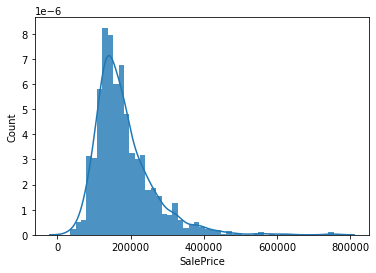

In [142]:
sns.distplot(df_numerical['SalePrice'], kde=True, hist_kws={"alpha": 0.8})
plt.ylabel("Count")
plt.show()

As we can see that most houses fall in the range of 100000 and 200000. Sale price is rightly skewed 

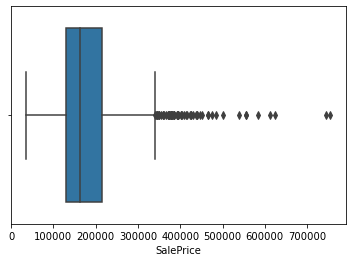

In [143]:
sns.boxplot(df_numerical['SalePrice'])
plt.show()

We want to see how to data is correlated with each other and how the predictor variable is correlated
with target variable.

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

We will show correlation between our dataset variables using a heatmap graph:

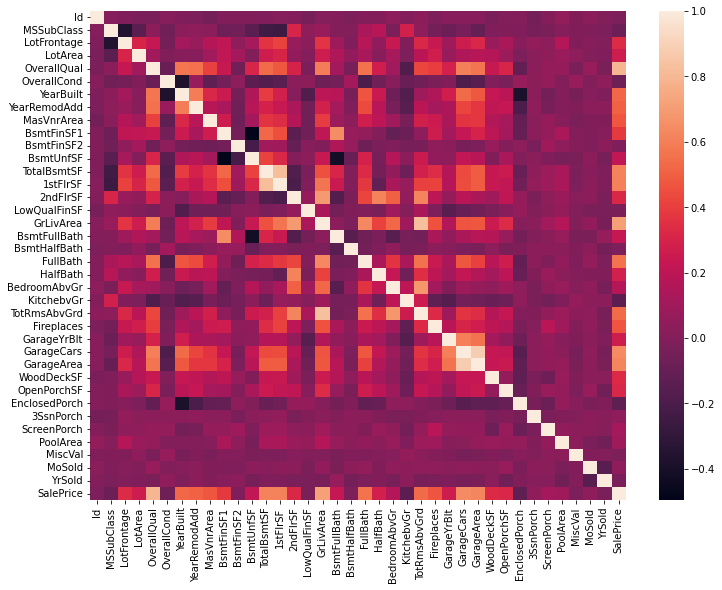

In [144]:
plt.figure(figsize=(12,9))
sns.heatmap(df_numerical.corr())
plt.show()

when looking at the heatmap esp. from the target variable perspective we can see that OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF are very highly correlated. but also GarageCars and GarageArea is very highly correlated which is obvious as more GarageArea will result is more Garage Cars so we can use it interchangably.
TotalbsmtSF and 1stFlrSF are very highly correlated.

More importantly while looking at the last row we see these 12 variables i.e. 

OverallQual                     0.79
GrLivArea                       0.71
GarageCars                      0.64
GarageArea                      0.62
TotalBsmtSF                     0.61
1stFlrSF                        0.61
FullBath                        0.56
TotRmsAbvGrd                    0.53
YearBuilt                       0.52
YearRemodAdd                    0.51
MasVnrArea                      0.47
Fireplaces                      0.47

In [145]:
df_num_selected = df_numerical[['OverallQual', 'GrLivArea','GarageCars','TotalBsmtSF',
                               '1stFlrSF', 'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd',
                               'MasVnrArea','Fireplaces','SalePrice']]

In [146]:
df_num_selected

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,SalePrice
0,7,1710,2,856,856,2,8,2003,2003,196.00,0,208500
1,6,1262,2,1262,1262,2,6,1976,1976,0.00,1,181500
2,7,1786,2,920,920,2,6,2001,2002,162.00,1,223500
3,7,1717,3,756,961,1,7,1915,1970,0.00,1,140000
4,8,2198,3,1145,1145,2,9,2000,2000,350.00,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,953,2,7,1999,2000,0.00,1,175000
1456,6,2073,2,1542,2073,2,7,1978,1988,119.00,2,210000
1457,7,2340,1,1152,1188,2,9,1941,2006,0.00,2,266500
1458,5,1078,1,1078,1078,1,5,1950,1996,0.00,0,142125


now that we have 12 columns out of 42 numerical columns lets check the distribution using the pair plot

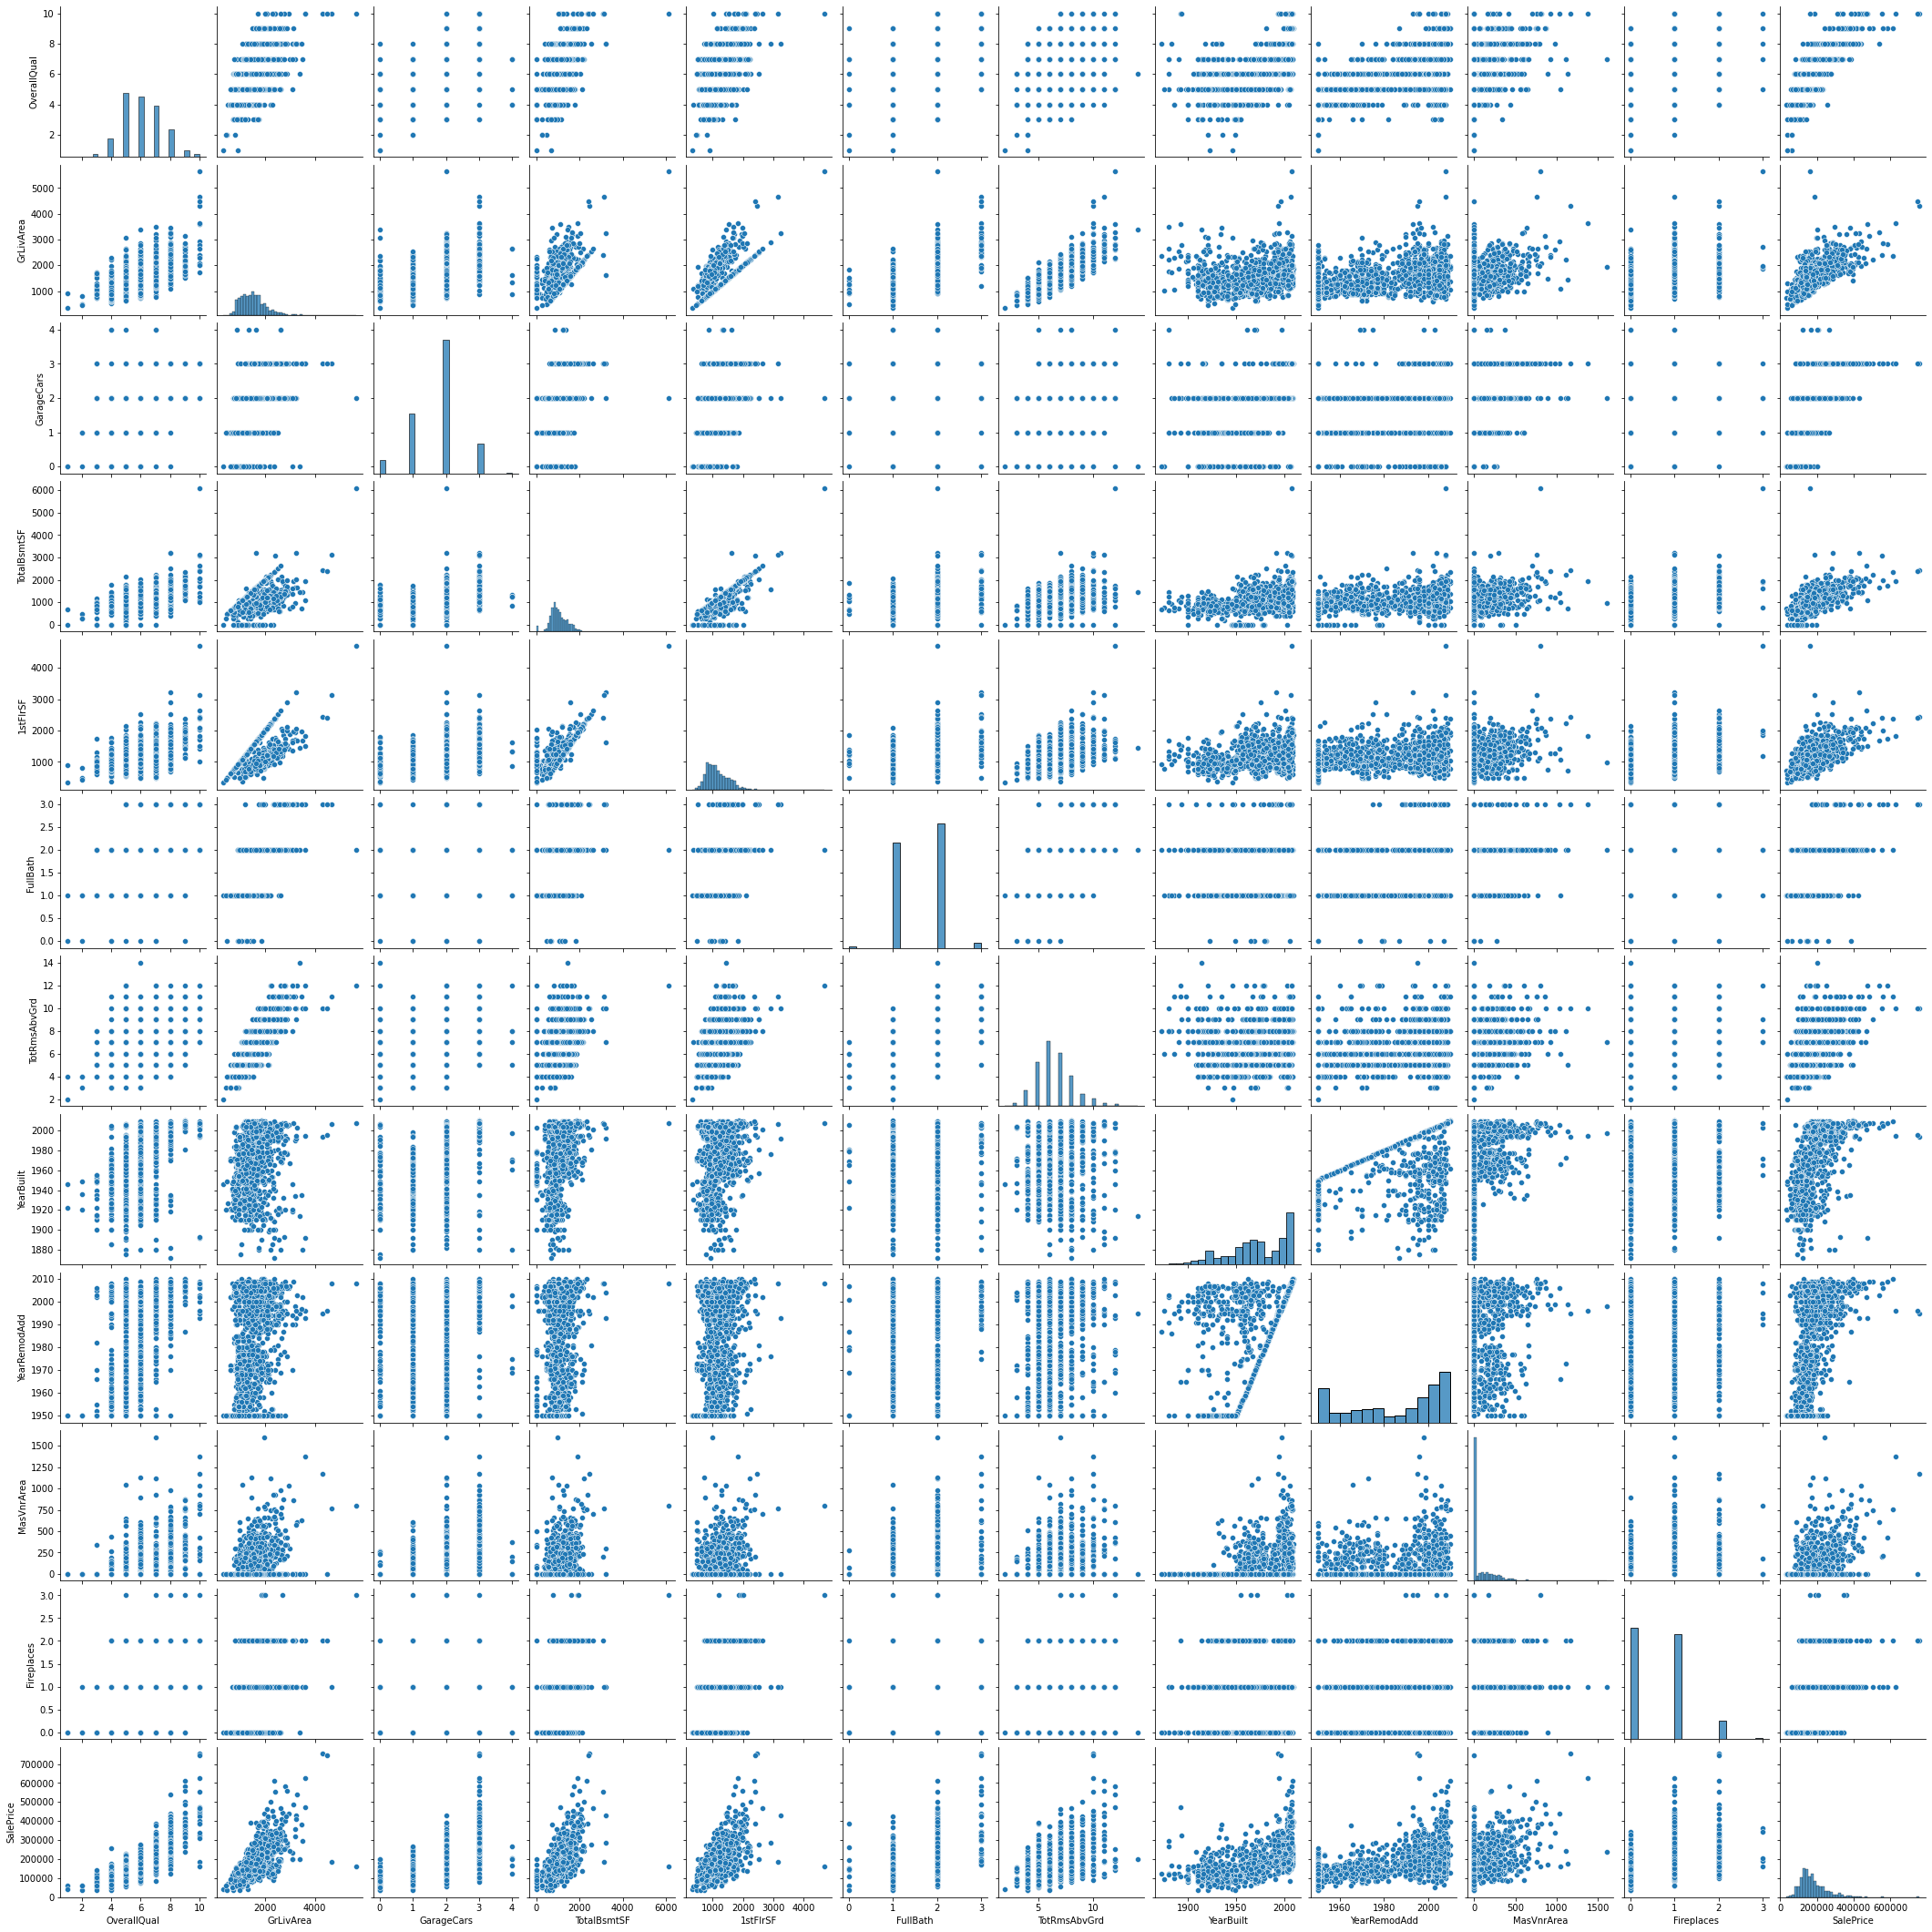

In [147]:
sns.pairplot(df_num_selected)
plt.show()

### 4. EDA For categorical variable

In [148]:
df_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [149]:
df_categorical['MiscFeature']

0         NA
1         NA
2         NA
3         NA
4         NA
        ... 
1455      NA
1456      NA
1457    Shed
1458      NA
1459      NA
Name: MiscFeature, Length: 1460, dtype: object

Since the Variable 'Alley','PoolQC' and 'MiscFeature' have a lot of NA values we can safely drop them out of the dataset 

In [150]:
df_categorical.drop(['PoolQC','Alley','MiscFeature'], axis=1, inplace=True)

In [151]:
cat_col = df_categorical.columns
cat_col[0]

'MSZoning'

Now lets look at how the Different categories affect the sale price using point plot in Sns library

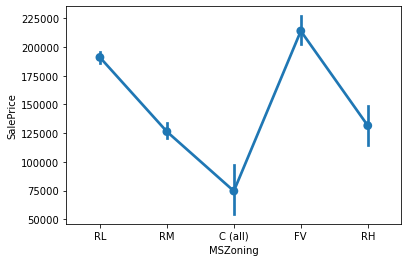

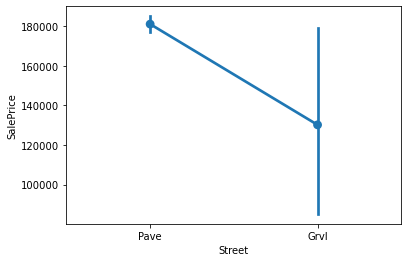

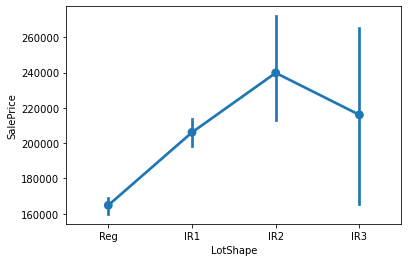

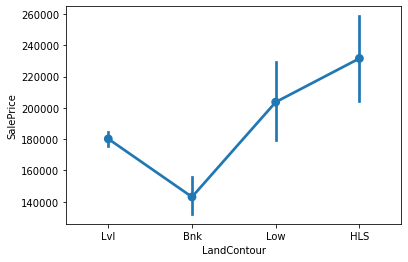

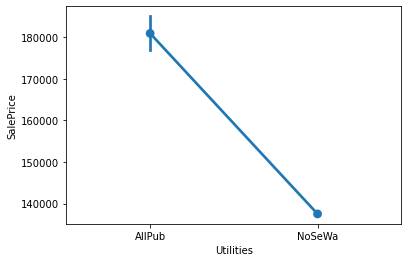

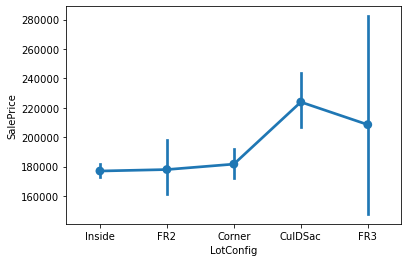

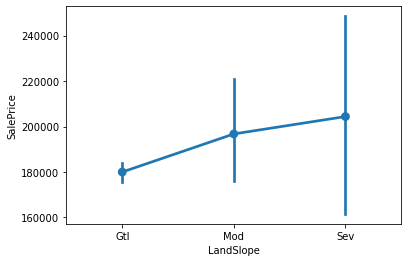

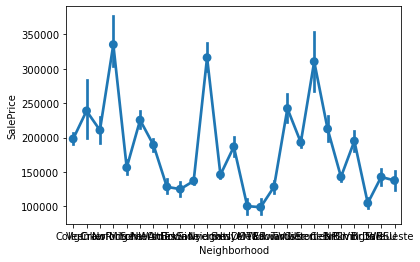

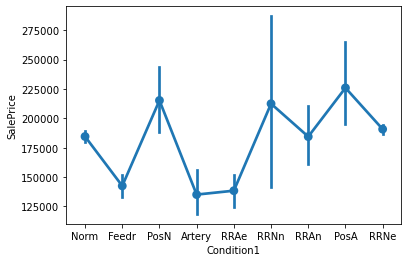

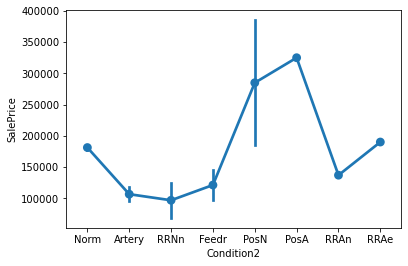

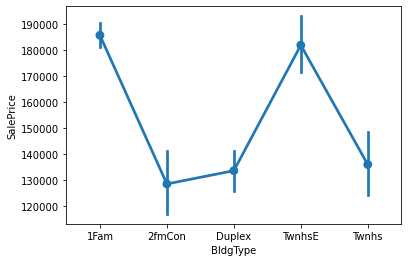

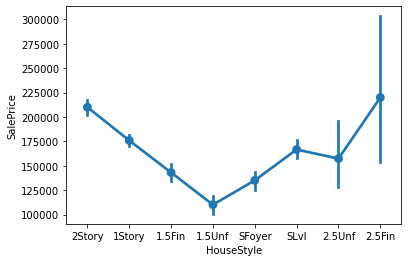

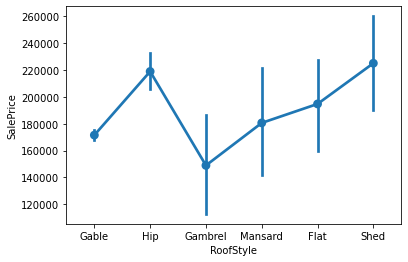

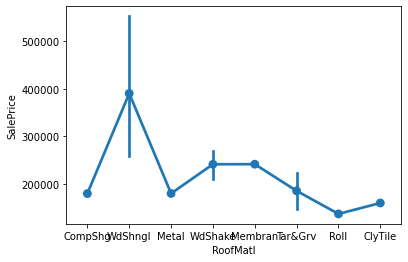

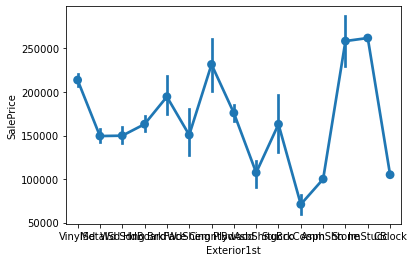

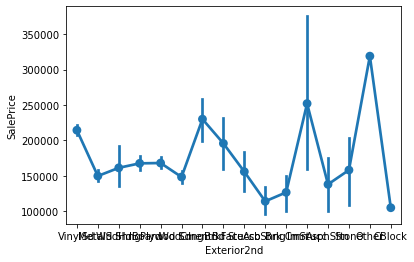

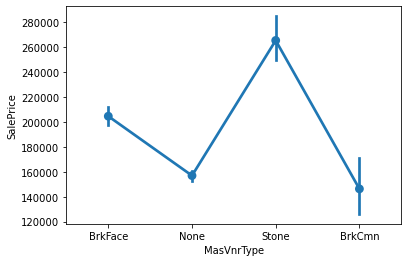

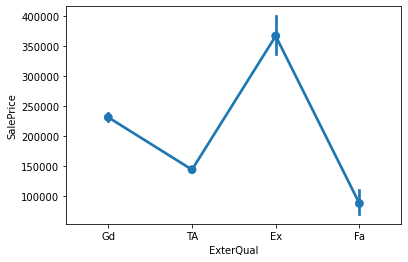

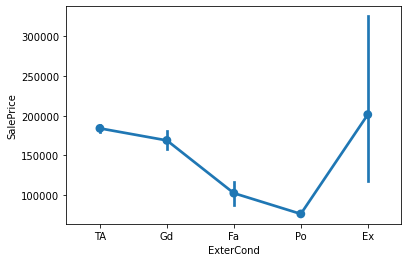

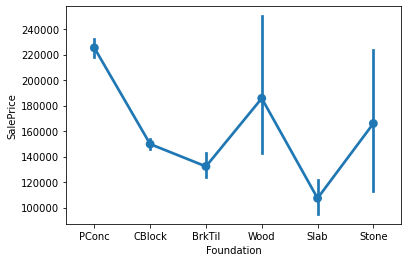

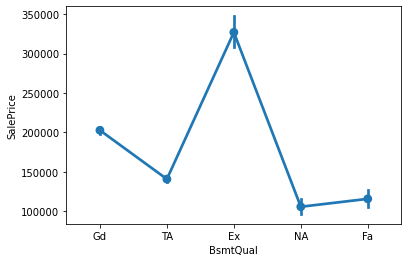

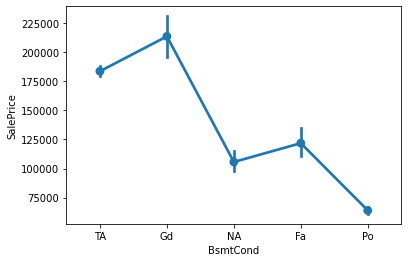

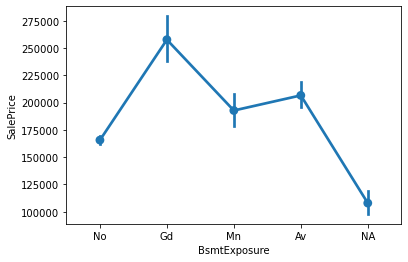

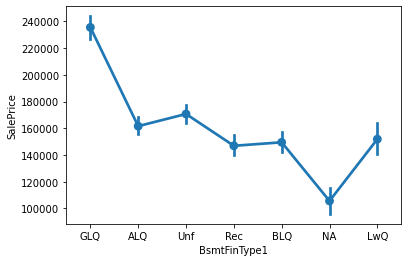

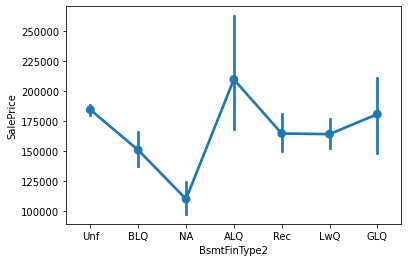

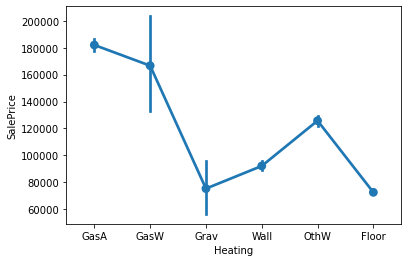

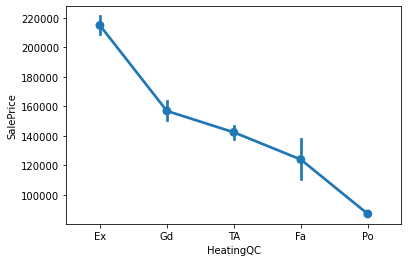

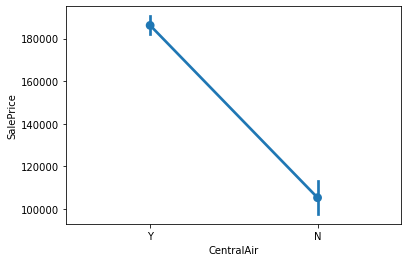

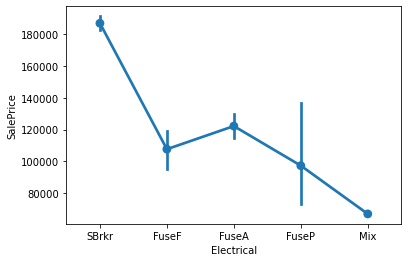

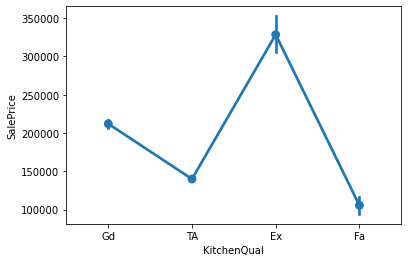

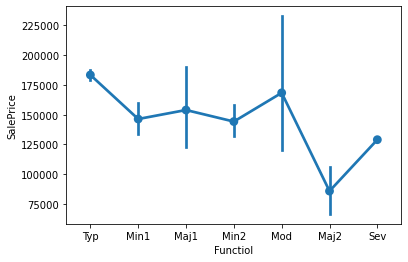

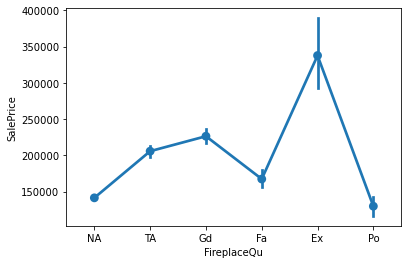

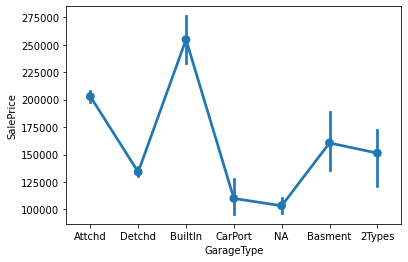

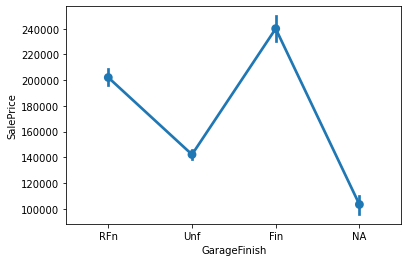

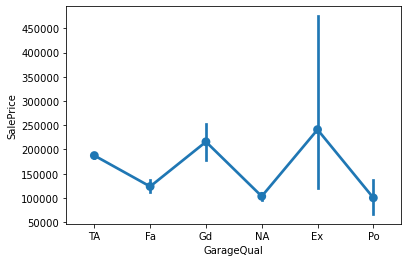

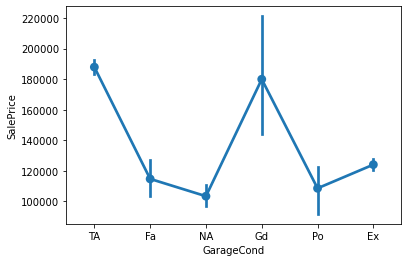

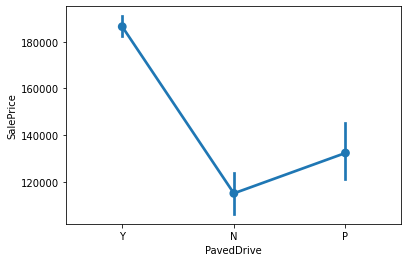

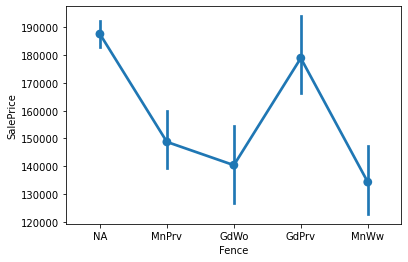

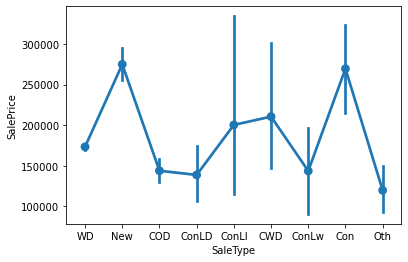

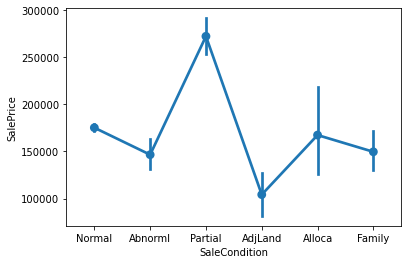

In [152]:
for i,col in enumerate(df_categorical.columns):
    plt.figure(i)
    sns.pointplot(data=df_categorical,x= col, y=df_num_selected['SalePrice'])
    plt.savefig("Pointplot - {}" .format(col))

Some category seems to be more diverse with respect to the Sale price.
For ex. Neighbourhood seems to have more impact on the sale price.

However, we’d like to have a better sense of which feature influences SalePrice more than others. What we’ll do is run one-way ANOVA tests for each categorical feature againt SalePrice. This will give us both the F statistic and p-values for each feature. 

In [153]:
df_categorical['SalePrice'] = df['SalePrice']

In [154]:
df_categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functiol,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,GdPrv,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NA,Attchd,Unf,TA,TA,Y,NA,WD,Normal,142125


In [161]:
df_categorical1 = df_categorical.drop('SalePrice', axis=1)

In [163]:
df_categorical1

cat_features = df_categorical1.columns

In [169]:
# MSZoning
anv = pd.DataFrame()
anv['features'] = cat_features
pvals = []
for c in cat_features:
    sample = []
    for cls in df_categorical[c].unique():
        s = df_categorical[df_categorical[c] == cls]['SalePrice'].values
        sample.append(s)
    pval = stats.f_oneway(*sample)[1]
    pvals.append(pval)
#pvals.append(pval)
anv['Pval'] = pvals
anv['disparity'] = np.log(1./anv['Pval'].values)
anv.sort_values(by='disparity', ascending = False, inplace=True)

Now we can see the importance of the categorical variable by the p-values with ANOVA

We can take the top 15  features 

- Neighborhood
-        ExterQual
-         BsmtQual
-      KitchenQual
-     GarageFinish
-      FireplaceQu
-       Foundation
-       GarageType
-     BsmtFinType1
-        HeatingQC
-       MasVnrType
-     BsmtExposure
-    SaleCondition
-      Exterior1st
-     Exterior2nd

### 4. Combine both numerical and categorical features

In [187]:
df_cat_final = df_categorical[['Neighborhood','ExterQual','BsmtQual','KitchenQual','GarageFinish','FireplaceQu'
                   ,'Foundation','GarageType','BsmtFinType1','HeatingQC','MasVnrType','BsmtExposure'
                   ,'SaleCondition','Exterior1st','Exterior2nd','SalePrice']]

In [197]:
df_final = df_num_selected.join(df_cat_final,lsuffix='_1')

In [199]:
df_final = df_final.drop('SalePrice_1', axis=1)

In [200]:
df_final

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,Neighborhood,ExterQual,BsmtQual,KitchenQual,GarageFinish,FireplaceQu,Foundation,GarageType,BsmtFinType1,HeatingQC,MasVnrType,BsmtExposure,SaleCondition,Exterior1st,Exterior2nd,SalePrice
0,7,1710,2,856,856,2,8,2003,2003,196.00,0,CollgCr,Gd,Gd,Gd,RFn,NA,PConc,Attchd,GLQ,Ex,BrkFace,No,Normal,VinylSd,VinylSd,208500
1,6,1262,2,1262,1262,2,6,1976,1976,0.00,1,Veenker,TA,Gd,TA,RFn,TA,CBlock,Attchd,ALQ,Ex,None,Gd,Normal,MetalSd,MetalSd,181500
2,7,1786,2,920,920,2,6,2001,2002,162.00,1,CollgCr,Gd,Gd,Gd,RFn,TA,PConc,Attchd,GLQ,Ex,BrkFace,Mn,Normal,VinylSd,VinylSd,223500
3,7,1717,3,756,961,1,7,1915,1970,0.00,1,Crawfor,TA,TA,Gd,Unf,Gd,BrkTil,Detchd,ALQ,Gd,None,No,Abnorml,Wd Sdng,Wd Shng,140000
4,8,2198,3,1145,1145,2,9,2000,2000,350.00,1,NoRidge,Gd,Gd,Gd,RFn,TA,PConc,Attchd,GLQ,Ex,BrkFace,Av,Normal,VinylSd,VinylSd,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,953,2,7,1999,2000,0.00,1,Gilbert,TA,Gd,TA,RFn,TA,PConc,Attchd,Unf,Ex,None,No,Normal,VinylSd,VinylSd,175000
1456,6,2073,2,1542,2073,2,7,1978,1988,119.00,2,NWAmes,TA,Gd,TA,Unf,TA,CBlock,Attchd,ALQ,TA,Stone,No,Normal,Plywood,Plywood,210000
1457,7,2340,1,1152,1188,2,9,1941,2006,0.00,2,Crawfor,Ex,TA,Gd,RFn,Gd,Stone,Attchd,GLQ,Ex,None,No,Normal,CemntBd,CmentBd,266500
1458,5,1078,1,1078,1078,1,5,1950,1996,0.00,0,mes,TA,TA,Gd,Unf,NA,CBlock,Attchd,GLQ,Gd,None,Mn,Normal,MetalSd,MetalSd,142125


### 5. Plot box plot for the new dataset to find the variables with outliers

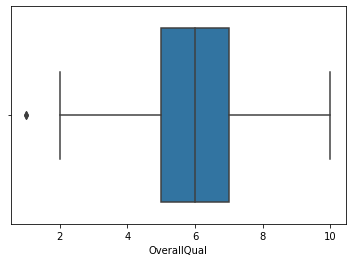

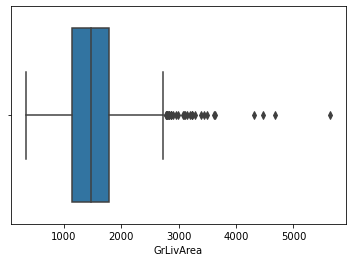

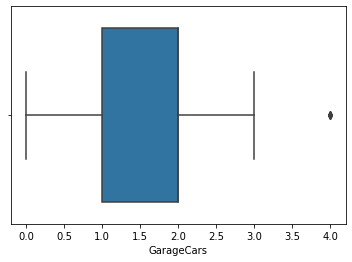

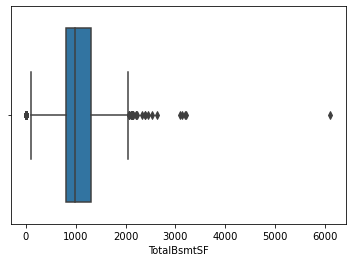

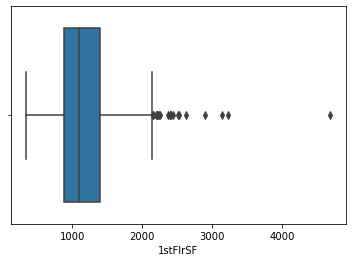

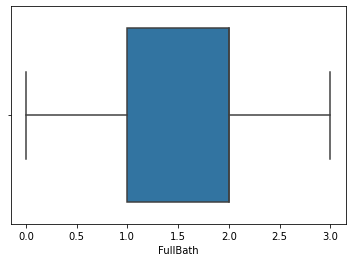

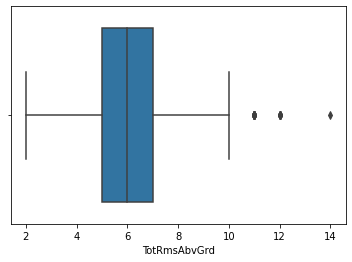

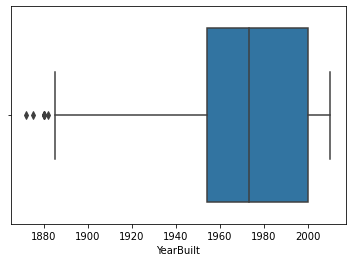

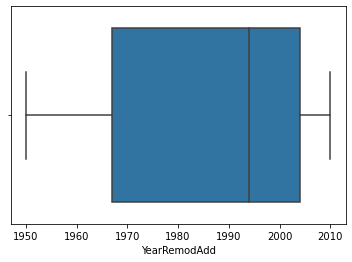

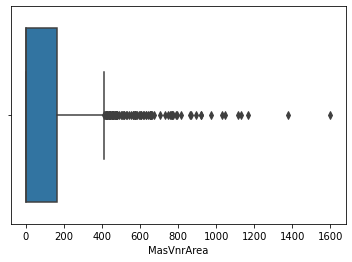

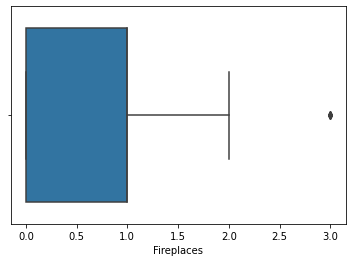

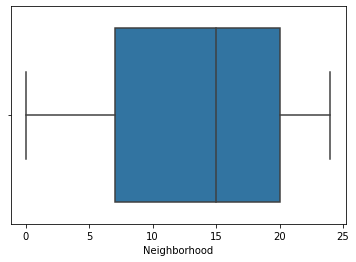

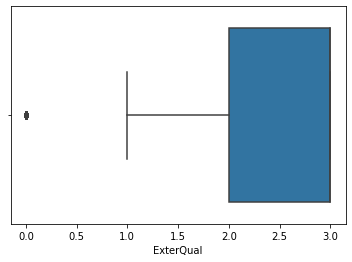

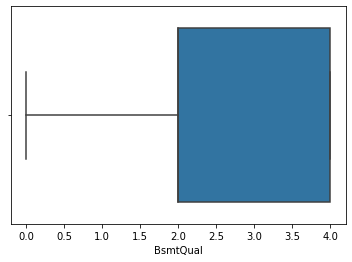

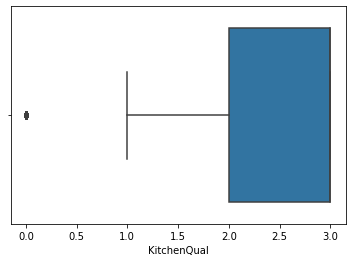

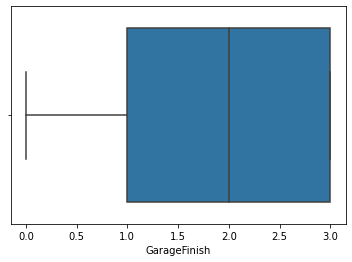

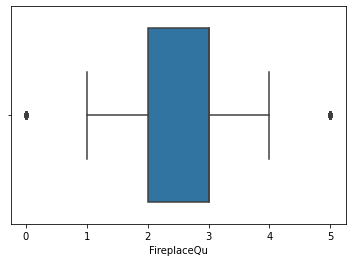

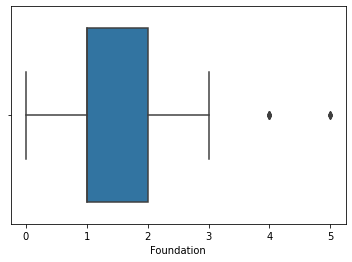

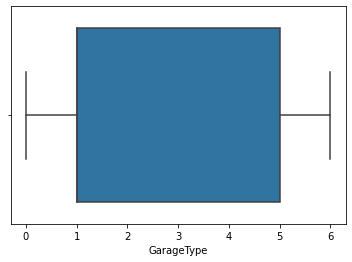

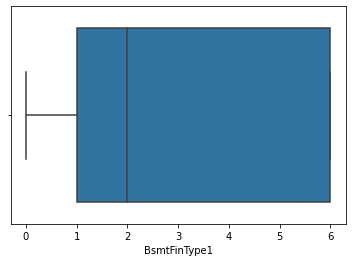

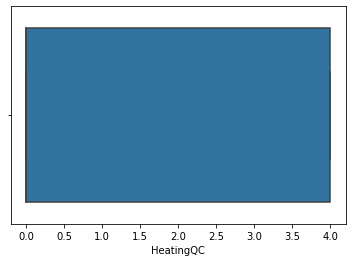

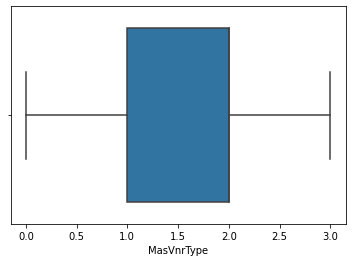

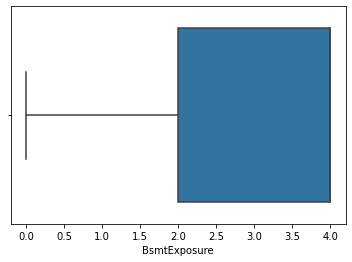

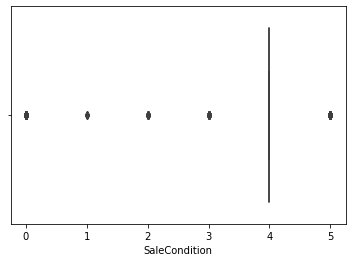

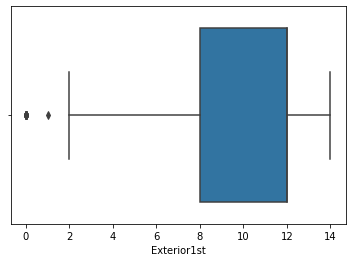

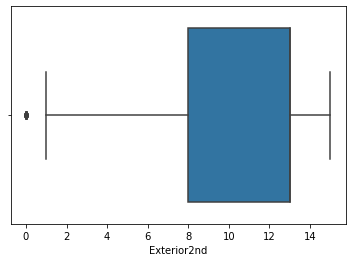

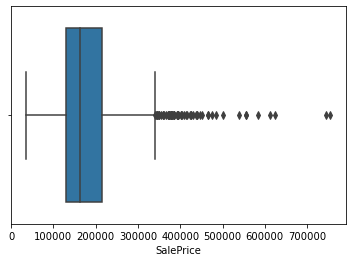

In [239]:
for i in df_final.columns:
    plt.figure()
    sns.boxplot(data=df_final1,x=i)
    plt.savefig("Box plot:{}.jpeg" .format(i))
    
plt.show()

In [210]:
col_to_plot

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'Fireplaces', 'Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual',
       'GarageFinish', 'FireplaceQu', 'Foundation', 'GarageType',
       'BsmtFinType1', 'HeatingQC', 'MasVnrType', 'BsmtExposure',
       'SaleCondition', 'Exterior1st', 'Exterior2nd', 'SalePrice'],
      dtype='object')

<AxesSubplot:ylabel='Neighborhood'>

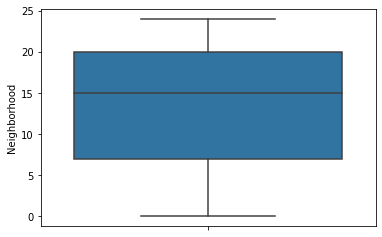

In [232]:
sns.boxplot(data=df_final1, y='Neighborhood')

In [223]:
cat_col1 = df_final.select_dtypes(include=['object']).columns

In [224]:
cat_col1

Index(['Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish',
       'FireplaceQu', 'Foundation', 'GarageType', 'BsmtFinType1', 'HeatingQC',
       'MasVnrType', 'BsmtExposure', 'SaleCondition', 'Exterior1st',
       'Exterior2nd'],
      dtype='object')

In [229]:
df_final1 = df_final.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_col1:
    df_final1[i] = le.fit_transform(df_final1[i])

In [230]:
df_final1

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,Neighborhood,ExterQual,BsmtQual,KitchenQual,GarageFinish,FireplaceQu,Foundation,GarageType,BsmtFinType1,HeatingQC,MasVnrType,BsmtExposure,SaleCondition,Exterior1st,Exterior2nd,SalePrice
0,7,1710,2,856,856,2,8,2003,2003,196.00,0,5,2,2,2,2,3,2,1,2,0,1,4,4,12,13,208500
1,6,1262,2,1262,1262,2,6,1976,1976,0.00,1,23,3,2,3,2,5,1,1,0,0,2,1,4,8,8,181500
2,7,1786,2,920,920,2,6,2001,2002,162.00,1,5,2,2,2,2,5,2,1,2,0,1,2,4,12,13,223500
3,7,1717,3,756,961,1,7,1915,1970,0.00,1,6,3,4,2,3,2,0,5,0,2,2,4,0,13,15,140000
4,8,2198,3,1145,1145,2,9,2000,2000,350.00,1,14,2,2,2,2,5,2,1,2,0,1,0,4,12,13,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,953,2,7,1999,2000,0.00,1,8,3,2,3,2,5,2,1,6,0,2,4,4,12,13,175000
1456,6,2073,2,1542,2073,2,7,1978,1988,119.00,2,13,3,2,3,3,5,1,1,0,4,3,4,4,9,10,210000
1457,7,2340,1,1152,1188,2,9,1941,2006,0.00,2,6,0,4,2,2,2,4,1,2,0,2,4,4,5,5,266500
1458,5,1078,1,1078,1078,1,5,1950,1996,0.00,0,24,3,4,2,3,3,1,1,2,2,2,2,4,8,8,142125
